<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>December 8, 2023</center>

# <center><ins>TP Class N°6 - Spatial filters</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 21 December 2023, 23h59**.
* The name of the file you upload should be **TP6_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP6_name_surname.zip**.

# Exercise 1. Explain the code <span style="font-size: 16px; font-weight:normal; font-style: italic;"> (0.25 point)</span> <span style="color:red;font-size: 16px; font-weight:normal">

Run the following code. Explain the difference in the produced results. Make conclusion.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot(I, Titles, dr=1, dc=1, cmap="gray"):
    fig = plt.figure()
    for i in range(len(I)):
      plt.subplot(dr,dc,i+1)
      plt.imshow(I[i], cmap=cmap)
      plt.title(Titles[i])
      plt.axis("off")

    plt.show()

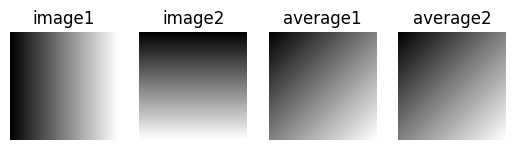

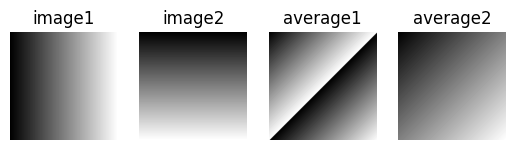

In [4]:
image1 = np.arange(0, 255)*np.ones((255, 255))
image2 = np.transpose(np.copy(image1))
av1 = (image1 + image2)/2
av2 = image1/2 + image2/2

plot([image1, image2, av1, av2], 
     ["image1", "image2", "average1", "average2"], 
     dc=4)

image1 = image1.astype(np.uint8)
image2 = image2.astype(np.uint8)
av1 = (image1 + image2)/2
av2 = image1/2 + image2/2

plot([image1, image2, av1, av2], 
     ["image1", "image2", "average1", "average2"], 
     dc=4)

The first set of image is obtained by image with int from 0 to 255. We can observe than all is right.
The second set of image is obtained by image with uint8 from 0 to 255. The difference between int and uint8 is that int can be negative whereas uint8 can't, and int is coded with more than 8 bits, whereas uint8 is coded on 8 bits. So uint8 can only represent number from 0 to 255, and if we made 255 + 1, we'll obtain 0 because of overflow and if we made 0 - 1, we'll obtain 255 because of underflow.

In the first set of image, all seems to be good, whereas in the second set of image, I think that there is a little problem with the average 1. The code for average 1 is:
```python
av1 = (image1 + image2)/2
```

In fact, we have here a overflow problem: we have at some points (image1 + image2) > 255, so we have an overflow, and the real result obtained is less than 255, so when we divide the result by 2, we don't obtain the good result. And at the other points of the image, we don't have any problems because we have (image1 + image2) $\leq$ 255.

The set obtained with int has no problem because when (image1 + image2) > 255, there is no overflow and the real result is more than 255, so we keep the value obtained, and then we divide it by 2, that's why the result is always in range 0, 255.

# Exercise 2. Convolution and correlation <span style="font-size: 16px; font-weight:normal; font-style: italic;"> (0.75 point)</span>

Let there be the functions:

>$
\begin{array}{rcl}
x(n) & = & \delta(n-1) + \delta(n-2) + \delta(n-3)\\
h_1(n) & = & \delta(n) + 2\delta(n-1) + 3\delta(n-2) \\
h_2(n) & = & \delta(n+2) + 2\delta(n+1) + 3\delta(n) + 2\delta(n-1) + \delta(n-2)\\
\end{array}
$
> $x(n) = \begin{bmatrix} 0 & 1 & 1 & 1 \end{bmatrix}
h_1(n) = \begin{bmatrix} 1 & 2 & 3\end{bmatrix}$

we have convolution, so $h_1$ is inverted. Then, for shift n = 0, h_1(0) overlap with x(0), the result is 0\times 1 =0
for shift n = 1, h_1(0) overlap with x(1), so we have 1 \times 1 = 1, so we have $\delta(n - 1)$
for shift n = 2, h_1(1) overlap with x(1) and h_1(0) overlap with x(2), we have 1 \times 1 + 2 \times 1, so we have $\delta(n - 1) + 3 \delta(n - 2)$
keyword: at shift n = ?, h(x ) overlap with x(b) giving us blabla \times \blabla = coucou so we have coucou \times \delta(n - shift)

for 2D: $\delta(n - x, n - y)$

(a) Convolve manually $x(n)$ with $h_1(n)$ and $h_2(n)$.

we have 
$$x(n)  =  \delta(n-1) + \delta(n-2) + \delta(n-3)$$

and the definition below:
$$\delta(n) = 
\begin{cases}
1 & \text{if} \ n = 0 \\
0 & \text{else}
\end{cases}
$$

So we have $x(0) = 0$ and $x(1) = 1$ and so on.

As we make a convolution, we have first to flip $h_1$ and $h_2$.

In my description, I build the result $r_1(n)$ step by step, so it is not a recursion when I write something like this: $r_1(n) = r_1(n) + blablabla$.
It just says that whe take the results obtained at the previous step and add element to this result.

So the convolution between $x(n)$ and $h_1(n)$ give us:

- At shift $s = 0$, $h_1(0) = 1$ overlap with $x(0) = 0$ giving us $1 \times 0 = 0$.

    So we have $r_1(n) = 0 \times \delta(n - s) = 0 \times \delta(n) = 0$

- At shift $s = 1$, $h_1(0) = 1$ overlap with $x(1) = 1$ and $h_1(1) = 2$ overlap with $x(0) = 0$ giving us $1 \times 1 + 2 \times 0 = 1$.

    So we have: $r_1(n) = r_1(n) + 1 \times \delta(n - s) =  0 + \delta(n - 1) = \delta(n - 1)$

- At shift $s = 2$, $h_1(0) = 1$ overlap with $x(2) = 1$ and $h_1(1) = 2$ overlap with $x(1) = 1$ and $h_1(2) = 3$ overlap with $x(0) = 0$ giving us $3 \times 0 + 2 \times 1 + 1 \times 1 = 3$.

    So we have: $r_1(n) = r_1(n) + 3 \times \delta(n - s) =  \delta(n - 1) + 3 \delta(n - 2)$

- At shift $s = 3$, $h_1(0) = 1$ overlap with $x(3) = 1$ and $h_1(1) = 2$ overlap with $x(2) = 1$ and $h_1(2) = 3$ overlap with $x(1) = 1$ giving us $3 \times 1 + 2 \times 1 + 1 \times 1 = 6$.

    So we have: $r_1(n) = r_1(n) + 6 \times \delta(n - s) =  \delta(n - 1) + 3 \delta(n - 2) + 6 \delta(n - 3)$

- At shift $s = 4$, $h_1(1) = 2$ overlap with $x(3) = 1$ and $h_1(2) = 3$ overlap with $x(2) = 1$ giving us $3 \times 1 + 2 \times 1 = 5$.

    So we have: $r_1(n) = r_1(n) + 5 \times \delta(n - s) =  \delta(n - 1) + 3 \delta(n - 2) + 6 \delta(n - 3) + 5 \delta(n - 4)$

- At shift $s = 5$, $h_1(2) = 3$ overlap with $x(3) = 1$ giving us $3 \times 1 = 3$.

    So we have: $r_1(n) = r_1(n) + 3 \times \delta(n - s) =  \delta(n - 1) + 3 \delta(n - 2) + 6 \delta(n - 3) + 5 \delta(n - 4) + 3\delta(n - 5)$

So the result of the convolution between $h_1(n)$ and $x(n)$ is given by
$$\boxed{r_1(n) = \delta(n - 1) + 3 \delta(n - 2) + 6 \delta(n - 3) + 5 \delta(n - 4) + 3\delta(n - 5)}$$

The convolution between $x(n)$ and $h_2(n)$ give us:

- At shift $s = -2$, $h_2(-2) = 1$ overlap with $x(0) = 0$ giving us $1 \times 0 = 0$.

    So we have $r_2(n) = 0 \times \delta(n - s) = 0 \times \delta(n + 2) = 0$

- At shift $s = -1$, $h_2(-1) = 2$ overlap with $x(0) = 0$ and $h_2(-2) = 1$ overlap with $x(1) = 1$ giving us $2 \times 0 + 1 \times 1 = 1$.

    So we have: $r_2(n) = r_2(n) + 1 \times \delta(n - s) =  0 + \delta(n + 1) = \delta(n + 1)$

- At shift $s = 0$, $h_2(0) = 3$ overlap with $x(0) = 0$ and $h_2(-1) = 2$ overlap with $x(1) = 1$ and $h_2(-2) = 1$ overlap with $x(2) = 1$ giving us $3 \times 0 + 2 \times 1 + 1 \times 1 = 3$.

    So we have: $r_2(n) = r_2(n) + 3 \times \delta(n - s) =  \delta(n + 1) + 3 \delta(n)$

- At shift $s = 1$, $h_2(1) = 2$ overlap with $x(0) = 0$ and $h_2(0) = 3$ overlap with $x(1) = 1$ and $h_2(-1) = 2$ overlap with $x(2) = 1$ and $h_2(-2) = 1$ overlap with $x(3) = 1$ giving us $2 \times 0 + 3 \times 1 + 2 \times 1 + 1 \times 1 = 6$.

    So we have: $r_2(n) = r_2(n) + 6 \times \delta(n - s) =  \delta(n + 1) + 3 \delta(n) + 6\delta(n - 1)$

- At shift $s = 2$, $h_2(2) = 1$ overlap with $x(0) = 0$ and $h_2(1) = 2$ overlap with $x(1) = 1$ and $h_2(0) = 3$ overlap with $x(2) = 1$ and $h_2(-1) = 2$ overlap with $x(3) = 1$ giving us $1 \times 0 + 2 \times 1 + 3 \times 1 + 2 \times 1 = 7$.

    So we have: $r_2(n) = r_2(n) + 7 \times \delta(n - s) =  \delta(n + 1) + 3 \delta(n) + 6\delta(n - 1) + 7\delta(n - 2)$

- At shift $s = 3$, $h_2(2) = 1$ overlap with $x(1) = 1$ and $h_2(1) = 2$ overlap with $x(2) = 1$ and $h_2(0) = 3$ overlap with $x(3) = 1$ giving us $1 \times 1 + 2 \times 1 + 3 \times 1 = 6$.

    So we have: $r_2(n) = r_2(n) + 6 \times \delta(n - s) =  \delta(n + 1) + 3 \delta(n) + 6\delta(n - 1) + 7\delta(n - 2) + 6 \delta(n - 3)$

- At shift $s = 4$, $h_2(2) = 1$ overlap with $x(2) = 1$ and $h_2(1) = 2$ overlap with $x(3) = 1$ giving us $1 \times 1 + 2 \times 1 = 3$.

    So we have: $r_2(n) = r_2(n) + 3 \times \delta(n - s) =  \delta(n + 1) + 3 \delta(n) + 6\delta(n - 1) + 7\delta(n - 2) + 6 \delta(n - 3) + 3 \delta(n - 4)$

- At shift $s = 5$, $h_2(2) = 1$ overlap with $x(3) = 1$ giving us $1 \times 1 = 1$.

    So we have: $r_2(n) = r_2(n) + 1 \times \delta(n - s) =  \delta(n + 1) + 3 \delta(n) + 6\delta(n - 1) + 7\delta(n - 2) + 6 \delta(n - 3) + 3 \delta(n - 4) + \delta(n - 5)$

So the result of the convolution between $h_2(n)$ and $x(n)$ is given by
$$\boxed{r_2(n) = \delta(n + 1) + 3 \delta(n) + 6\delta(n - 1) + 7\delta(n - 2) + 6 \delta(n - 3) + 3 \delta(n - 4) + \delta(n - 5)}$$

(b) Correlate manually $x(n)$ with $h_1(n)$ and $h_2(n)$.

The main difference between correlation and convolution is that to correlate, we don't have to flip $h_1(n)$ and $h_2(n)$.

So the correlation between $x(n)$ and $h_1(n)$ give us:

- At shift $s = 0$, $h_1(2) = 3$ overlap with $x(0) = 0$ giving us $3 \times 0 = 0$.

    So we have $r_3(n) = 0 \times \delta(n - s) = 0 \times \delta(n) = 0$

- At shift $s = 1$, $h_1(1) = 2$ overlap with $x(0) = 0$ and $h_1(2) = 3$ overlap with $x(1) = 1$ giving us $2 \times 0 + 3 \times 1 = 3$.

    So we have: $r_3(n) = r_3(n) + 3 \times \delta(n - s) =  0 + 3\delta(n - 1) = 3\delta(n - 1)$

- At shift $s = 2$, $h_1(0) = 1$ overlap with $x(0) = 0$ and $h_1(1) = 2$ overlap with $x(1) = 1$ and $h_1(2) = 3$ overlap with $x(2) = 1$ giving us $1 \times 0 + 2 \times 1 + 3 \times 1 = 5$.

    So we have: $r_3(n) = r_3(n) + 5 \times \delta(n - s) =  3\delta(n - 1) + 5\delta(n - 2)$

- At shift $s = 3$, $h_1(0) = 1$ overlap with $x(1) = 1$ and $h_1(1) = 2$ overlap with $x(2) = 1$ and $h_1(2) = 3$ overlap with $x(3) = 1$ giving us $1 \times 1 + 2 \times 1 + 3 \times 1 = 6$.

    So we have: $r_3(n) = r_3(n) + 6 \times \delta(n - s) =  3\delta(n - 1) + 5\delta(n - 2) + 6\delta(n - 3)$

- At shift $s = 4$, $h_1(0) = 1$ overlap with $x(2) = 1$ and $h_1(1) = 2$ overlap with $x(3) = 1$ giving us $1 \times 1 + 2 \times 1= 3$.

    So we have: $r_3(n) = r_3(n) + 3 \times \delta(n - s) =  3\delta(n - 1) + 5\delta(n - 2) + 6\delta(n - 3) + 3\delta(n - 4)$

- At shift $s = 5$, $h_1(0) = 1$ overlap with $x(3) = 1$ giving us $1 \times 1 = 1$.

    So we have: $r_3(n) = r_3(n) + 1 \times \delta(n - s) =  3\delta(n - 1) + 5\delta(n - 2) + 6\delta(n - 3) + 3\delta(n - 4) + \delta(n - 5)$


So the result of the correlation between $h_1(n)$ and $x(n)$ is given by
$$\boxed{r_3(n) = 3\delta(n - 1) + 5\delta(n - 2) + 6\delta(n - 3) + 3\delta(n - 4) + \delta(n - 5)}$$

For the correlation between $x(n)$ and $h_2(n)$, we don't need to compute anything because $h_2(n)$ flipped is exactly the same as $h_2(n)$ non flipped for the values of the indices.

We have the indices of $h_2(n) = \begin{bmatrix} 1 & 2 & 3 & 2 & 1 \end{bmatrix}$. So if we flip this matrix, we obtain exactly the same matrix.

So we will have exactly the same results, but for instance, we would have $h_2(2)$ instead of $h_2(-2)$ and so on.

So the result of the correlation between $h_2(n)$ and $x(n)$ is given by
$$\boxed{r_4(n) = \delta(n + 1) + 3 \delta(n) + 6\delta(n - 1) + 7\delta(n - 2) + 6 \delta(n - 3) + 3 \delta(n - 4) + \delta(n - 5)}$$

# Exercise 3. Low Pass Filtering <span style="font-size: 16px; font-weight:normal; font-style: italic;"> (1 point)</span>

(a) Program a function that performs image filtering with a square filter of arbitrary size. <br/>
> **Important:** try to program with a min amount of loops. Ideally without any loops.

In [47]:
import skimage as sk

def img_filter(image: np.ndarray, filter: np.ndarray) -> np.ndarray :
    size = len(filter)
    border = 0
    if size % 2 == 1:
        border = (size - 1) / 2
    else:
        border = size / 2
    border = int(border)
    newimage = np.zeros(image.shape)

    for i in range(border, image.shape[0] - border - 1):
        for j in range(border, image.shape[1] - border - 1):
            newimage[i, j] = np.sum(image[i - border:i + border + 1, j - border: j + border + 1] * filter)
    return newimage

def print_image(image: np.ndarray, title: str = "Image", cmap: str = "viridis"):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def open_image(path: str):
    image = plt.imread(path)
    return sk.img_as_float32(image)

(b)  By using your function, perform  the filtering of zero padded grayscale image *cameraman.jpg* with an average/box filter: <br/>
> $ h = \frac{1}{9} \left( \begin{matrix}
  11 & 1 & 1 \\
  1 & 1 & 1 \\
  1 & 1 & 1 \\
  \end{matrix} \right )$
  
  **Hint:** for zero padding the corresponding *numpy* function could be used.

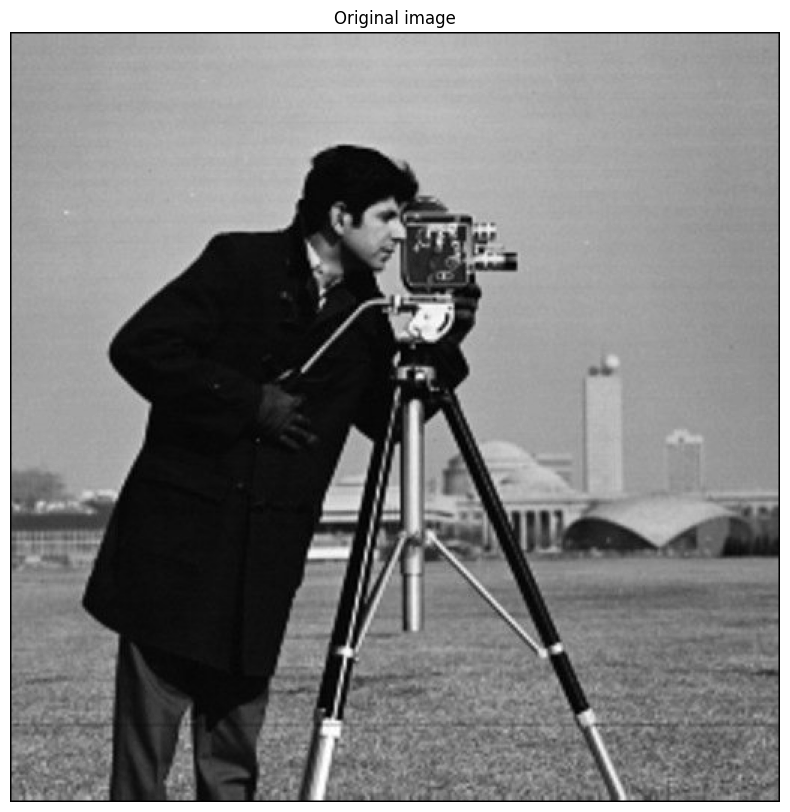

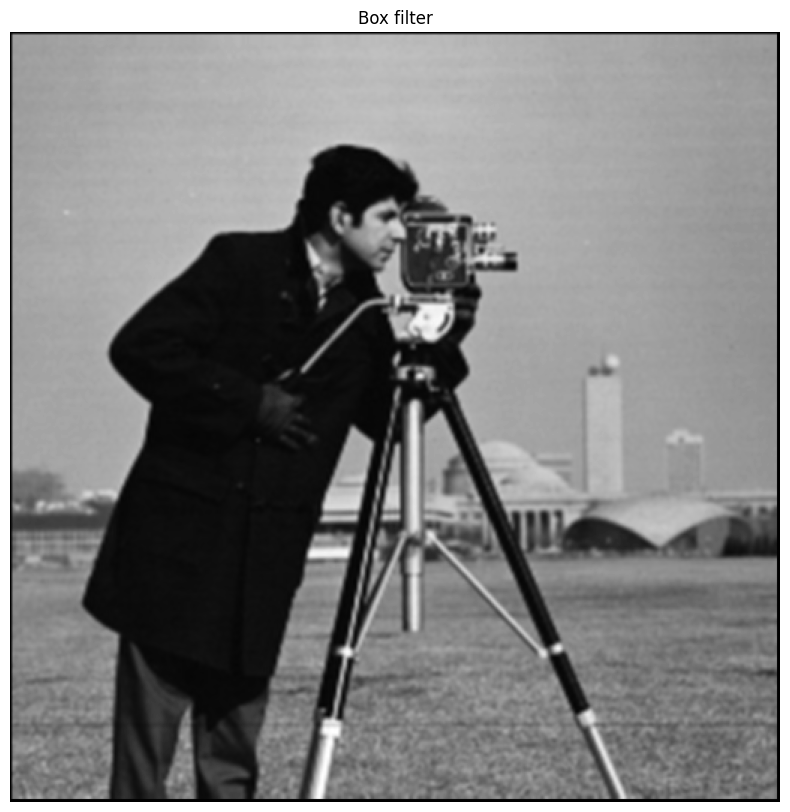

In [48]:
box_filter = np.ones((3, 3)) * 1/9

cameraman = open_image('./images/cameraman.jpg')
cameraman = np.pad(cameraman, [(1, 1), (1, 1)], 'constant', constant_values=0)
cameraman_filter = img_filter(cameraman, box_filter)

print_image(cameraman, "Original image", 'gray')
print_image(cameraman_filter, "Box filter", 'gray')

(c) By using your function, perform  the filtering of zero padded grayscale image *cameraman.jpg* with a Gaussian filter: <br/>
> $\textbf{h} = \frac{1}{16} \left ( \begin{matrix}{} 
	1 & 2 & 1 \\
	2 & 4 & 2 \\
	1 & 2 & 1
\end{matrix}
\right )$

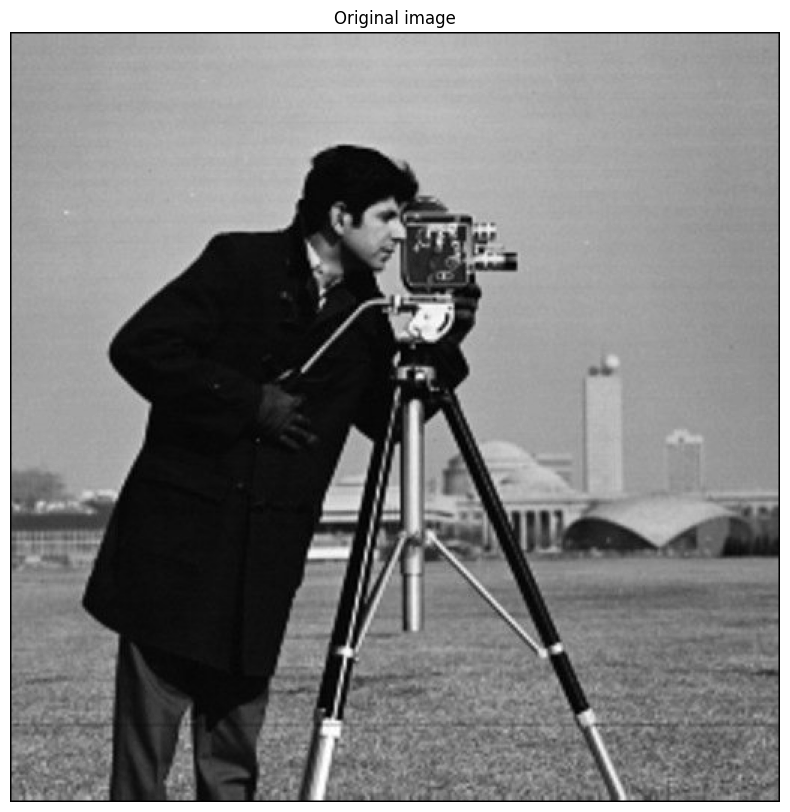

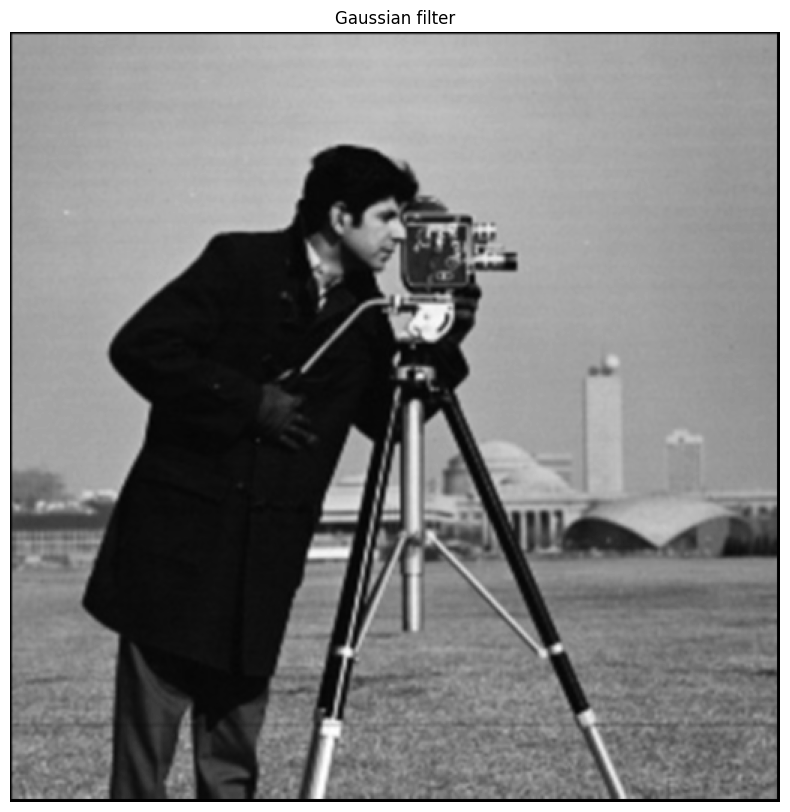

In [51]:
gaussian_filter = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

cameraman = open_image('./images/cameraman.jpg')
cameraman = np.pad(cameraman, [(1, 1), (1, 1)], 'constant', constant_values=0)
cameraman_filter = img_filter(cameraman, gaussian_filter)

print_image(cameraman, "Original image", 'gray')
print_image(cameraman_filter, "Gaussian filter", 'gray')

(d) How could the average/box and Gaussian filters to be modified to increase the blurring effect, i.e. remove more high frequency components? 

# Exercise 4. Border effects <span style="font-size: 16px; font-weight:normal; font-style: italic;"> (1 point)</span>

Generate an image (as illistrated in Figure 1) of size 512 $\times$ 512. 
<table>
    <tr style="background-color:#FFFFFF;">
    <td style='text-align:center;'>
       <img src='images/002.png' width="100" height="100"/>
    </td>
    </tr>
    <tr>
    <td style='text-align:center;'> 
    Figure 1.
    </td>
    </tr>
</table>

Using the *numpy* padding function and the box filter of size 31 $\times$ 31 (use your implemetation from the exercise 1): 

(a) investigate the influence of tree types border padding: 
   * zero padding
   * periodic extension
   * symmetric flip or mirror reflection   

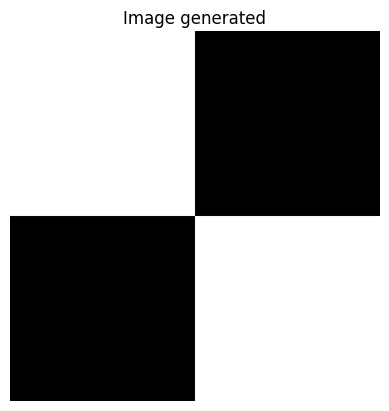

In [13]:
def generate_image(size: int) -> np.ndarray:
    img_1 = np.zeros((size, size))
    img_1[:, size // 2 :] = 1
    img_1 = img_1.astype(int)
    img_2 = np.rot90(img_1)
    img_1 = np.bitwise_xor(img_1, img_2)
    return img_1

print_image(generate_image(512), "Image generated", cmap='gray')

(b) Visualize the original, padded and filtered images. Explain the effects that one can observe.

(c) What are the advantages and disadvantages of each type of border extension?

The advantage of the zero padding is that it's very fast: we just add zeros

The advantage of the periodic extension is that the result obtained is better than a zero padding, and we can use a Fourrier transformation to applies filter more fastly because the padding is periodic

The advantage of the symetric flip is that it give us the best results, because each part added to the image will make sense because it's just the repetition of what it is near.

# Exercise 5. The Laplacian filter <span style="font-size: 16px; font-weight:normal; font-style: italic;"> (1 point)</span> 

The Laplacian filter kernel:
> $
\begin{equation}
\nabla^2 f(x,y) = f(x-1, y) + f(x+1, y) + f(x, y-1) + f(x, y+1) - 4f(x,y) \;\;\;\;\; (1)
\end{equation}
$

(a) Program and test (apply to the grayscale image *cameraman) the Laplacian filter based on the equation (1) and 3 $\times$ 3 neighbourhood. <br/>
> **Hint:** you can represent the equation (1) in a matrix form and use your implementaion  from the exercise 1.

> $\begin{bmatrix} (-1, -1) & (0, -1) & (1, -1) \\ (-1, 0) & (0, 0) & (1, 0)\end{bmatrix}$
> $\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0\end{bmatrix}$
> $\nabla^2 f(x, y) = \sum_{-\infty}^{\infty} c_{nm ?} f(x - n, y - m)$

sum = 0 -> take edges... sum = 1 -> blured edges...

make image sharpened: take image and add laplacien filter multiplied by a constant c: img_sharpened = img + c \times laplacien

unsharpened mask: img - img_blured

def laplacian_kernel()
for i i nrange(1, img_shape)
for j in range(1, img_shape[1])
img_laplacian[i, j] = np.sum(img[i - 1:i+2, j - 1:j+2] * kernel(matrix with 0 1 0 1 -4 1 ect...))

we can use a function different of our own function


laplacian sharpening: img + c * laplacian_filter(img)

do the same for gaussian sharpening

In [35]:
import skimage as sk

def laplacian_filter(image: np.ndarray) -> np.ndarray:
    newimage = image.copy()
    laplacian = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])
    for i in range(1, image.shape[0] - 2):
        for j in range(1, image.shape[1] - 2):
            newimage[i, j] = np.sum(image[i - 1: i + 2, j - 1: j + 2] * laplacian)
    return newimage
    




(b) Visualise the original and filtered images. Comment the effect of filtering.

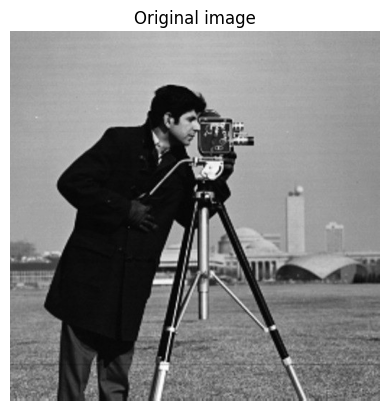

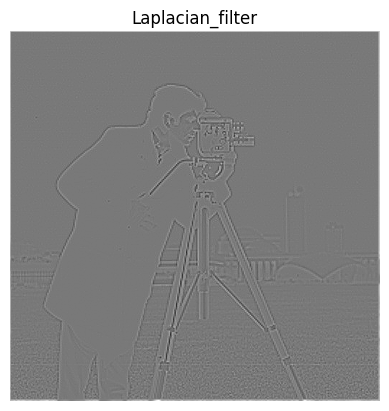

In [36]:
cameraman = open_image('./images/cameraman.jpg')

cameraman_laplacian = laplacian_filter(cameraman)

print_image(cameraman, "Original image", "gray")
print_image(cameraman_laplacian, "Laplacian_filter", "gray")

We can see that the laplacian filter brings out the sharp of the image.

In fact, if we calculate the sum of each elements of the filter, we have $\sum_i \sum_j laplacian[i, j] = 0$ : we have $1 + 1 + 1 + 1 - 4 = 0$.

As the sum of the elements of the filter is equal to 0, the filter brings out the sharps of the image: we take all the edges of the image.

The laplacian filter increase the image quality by highlighting sharp intensity transitions and deemphasizing regions of slowly varying regions.

So the sharp intensity transitions are more visible thanks to the laplacian filter.

# Exercise 6. Mechanism of sharpening <span style="font-size: 16px; font-weight:normal; font-style: italic;"> (1 point)</span>


$ \lim_{\epsilon -> 0} \frac{f(x + \epsilon) - f (x)}{\epsilon} \approx (\text{We are in a discrete domain !} \frac{f(x + 1) - f(x)}{1})$

Take the grayscale image *cameraman* $A$. Blur this image with a box filter of size 3 $\times$ 3 $B$.

(a) $E_1$: definding the optimal parameters perform the sharpening of $B$ using the Gaussian filter.

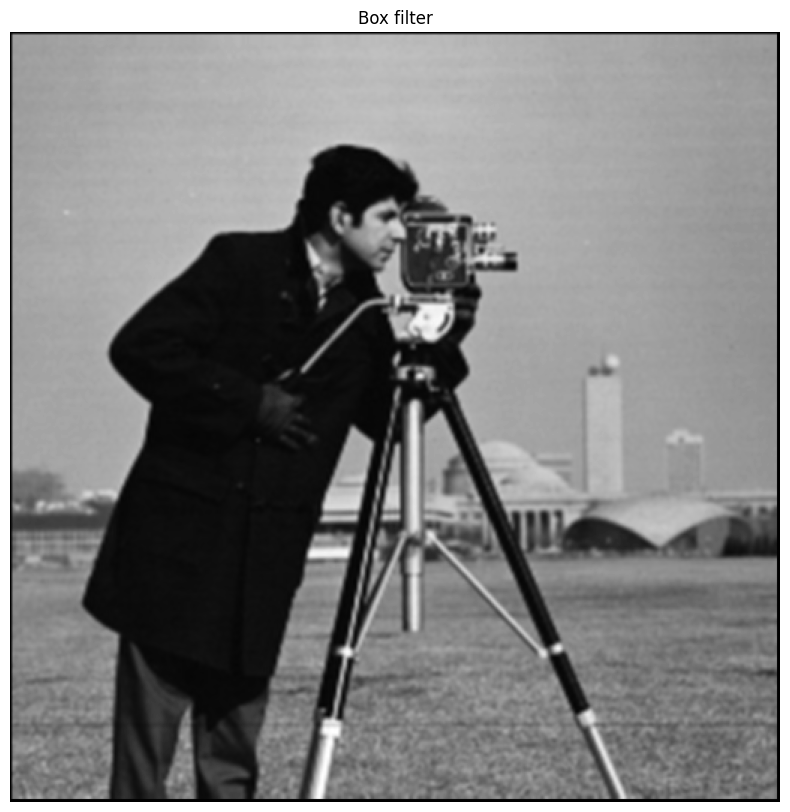

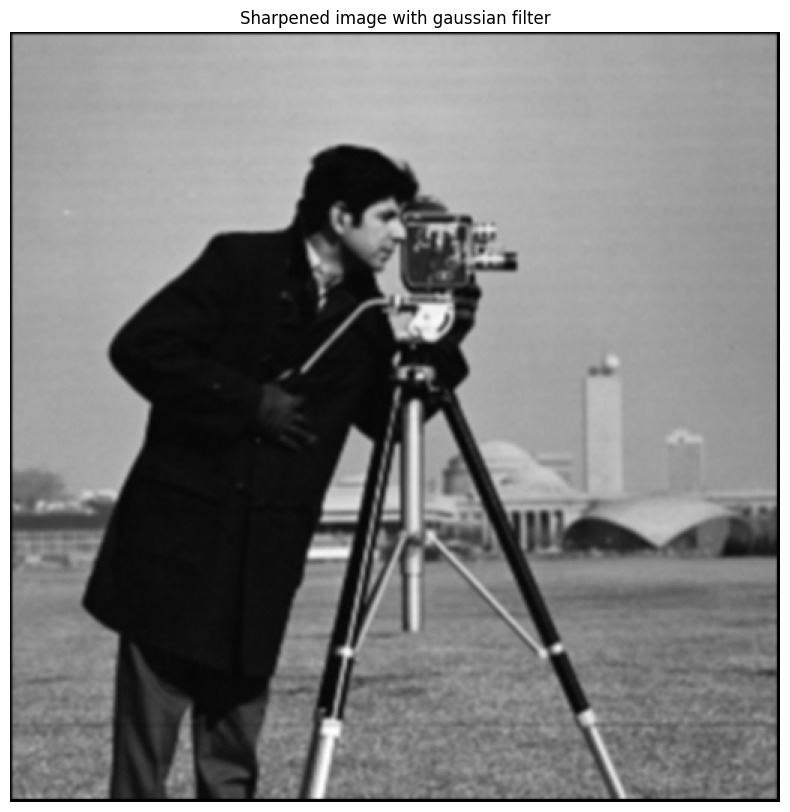

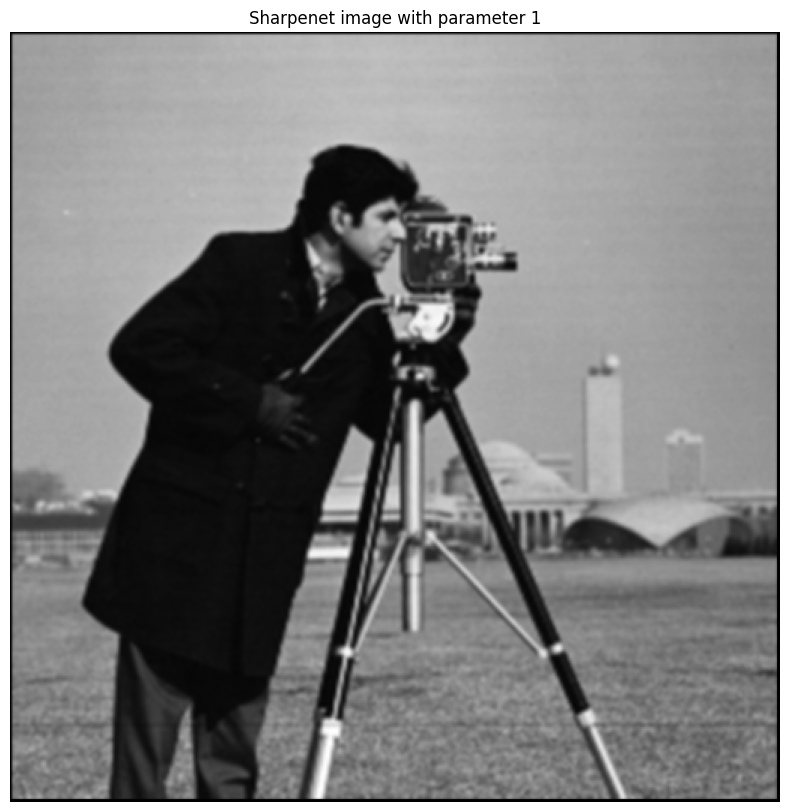

In [60]:
def MSE(img_1: np.ndarray, img_2: np.ndarray) -> float:
    return np.mean((sk.img_as_float32(img_1) - sk.img_as_float32(img_2))**2)

box_filter = np.ones((3, 3)) * 1/9

cameraman = open_image('./images/cameraman.jpg')
cameraman = np.pad(cameraman, [(1, 1), (1, 1)], 'constant', constant_values=0)
cameraman_filter = img_filter(cameraman, box_filter)

print_image(cameraman_filter, "Box filter", 'gray')

def sharpening_gaussian(image: np.ndarray, parameter: int):
    gaussian_filter = 1/16 * np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ])
    return image + parameter * img_filter(image, gaussian_filter)

print_image(sharpening_gaussian(cameraman_filter, 3), "Sharpened image with gaussian filter", 'gray')

min = 1
parameter = 0
for i in range(1, 11):
    sharpened_image = sharpening_gaussian(cameraman_filter, i)
    mse = MSE(cameraman, sharpened_image)
    if mse < min:
        min = mse
        parameter = i

print_image(sharpening_gaussian(cameraman_filter, parameter), f"Sharpenet image with parameter {parameter}", 'gray')

(b) $E_2$: definding the optimal parameters perform the sharpening of $B$ using the Laplacian filter. <br/>
>**Hint:** try to find the parameters that minimise the *mse* between the original $A$ and enhanced images $E_1$ and $E_2$.

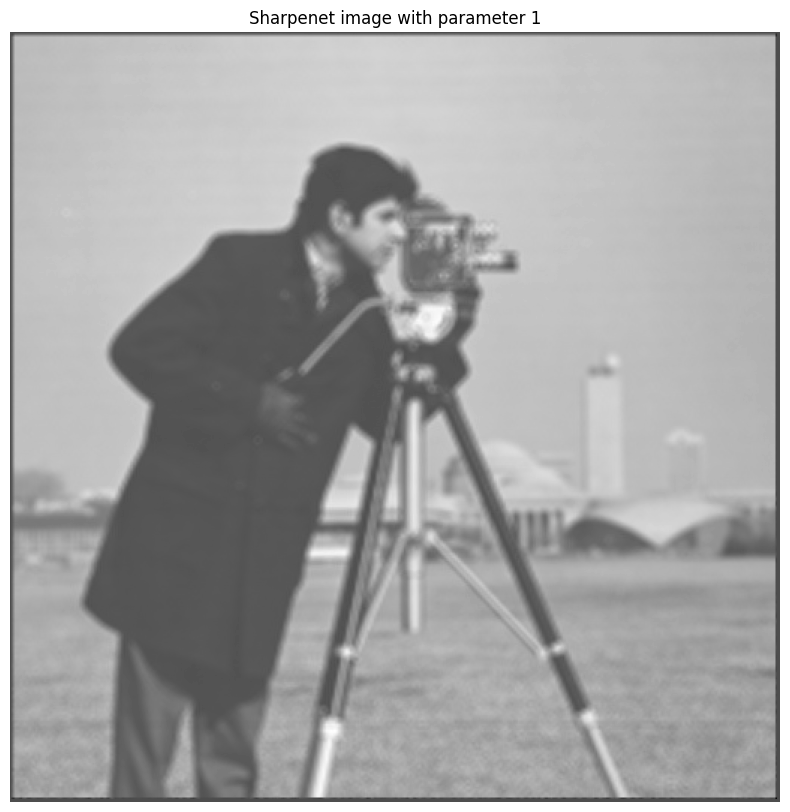

In [61]:
def sharpening_laplacian(image: np.ndarray, parameter: int):
    return image  + parameter * laplacian_filter(image)

min = 1
parameter = 0
for i in range(1, 11):
    sharpened_image = sharpening_laplacian(cameraman_filter, i)
    mse = MSE(cameraman, sharpened_image)
    if mse < min:
        min = mse
        parameter = i

print_image(sharpening_laplacian(cameraman_filter, parameter), f"Sharpenet image with parameter {parameter}", 'gray')

(c) Display blurred $B$ and enhanced images $E_1$ and $E_2$. Comment the quality of the enhanced images based on the visual quality and based on the *mse* between the original $A$ and enhanced images $E_1$ and $E_2$. <br/>
>**Hint:** for this exercise use the formulas from the Theme 6 page 56.

# Exercise 7. Order statistics filtering <span style="font-size: 16px; font-weight:normal; font-style: italic;"> (1 point)</span>

You are given two noisy images *tp6_005* and *tp6_006* corrupted by "impulse" noise.
<table>
    <tr style="background-color:#FFFFFF;">
    <td style='text-align:center;'>
       <img src='images/tp6_005.jpg' width="250" />
    </td>
    <td style='text-align:center;'>
       <img src='images/tp6_006.jpg' width="200" />
    </td>    
    </tr>
    <tr style="background-color:#FFFFFF;">
    <td style="text-align:center;">(a) tp6_005</td>
    <td style="text-align:center;">(b) tp6_006</td>    
    </tr>
    <tr style="background-color:#FFFFFF;">
    <td colspan=2 style="text-align:center;"> 
    Figure 2.
    </td>
    </tr>    
</table>

(a) Defining the optimal parameters (filter size) by yourself try to remove the noise with: 
   * averaging filter
   * median filter

(b)  Visualise the images before and after filtering. Report the used parameres of filtering. Comment the denoising efficiency based on the visual image quality.  
> look beter or not... 

# Exercise 8. Solving a Jigsaw Puzzle <span style="font-size: 16px; font-weight:normal; font-style: italic;"> (1 point)</span> <span style="color:red;font-size: 16px; font-weight:normal"> Non obligatory, bonus exercise</span> 


The goal of this exercise is to use image processing to automatically solve a jigsaw puzzle. The image *tp6_003* (see Figure 3.a) shows the pieces of a jigsaw puzzle. The reference image *tp6_004* is shown in Figure 3.b. Note that when the puzzle pieces are assembled together, the completed puzzle has potentially a different area than the reference image.
<table>
    <tr style="background-color:#FFFFFF;">
    <td style='text-align:center;'>
       <img src='images/tp6_003.png' width="450" />
    </td>
    <td style='text-align:center;'>
       <img src='images/tp6_004.jpg' width="150" />
    </td>    
    </tr>
    <tr style="background-color:#FFFFFF;">
    <td style="text-align:center;">(a) Puzzle image tp6_003</td>
    <td style="text-align:center;">(b) Reference tp6_004</td>    
    </tr>
    <tr style="background-color:#FFFFFF;">
    <td colspan=2 style="text-align:center;"> 
    Figure 3.
    </td>
    </tr>    
</table>

Implement an image processing algorithm to automatically locate where each jigsaw piece fits in completed puzzle. Clearly describe the steps of your algorithm, showing intermediate results for clarification if helpful. 

> **Hint:** for the cross-correlation you might use *scipy.signal.correlate2d(.)*. 
>
> **Important:** for cross-correlation both images should be normalized (zero mean, unit variance).

In [ ]:
calculer les bords et regarder qu'est ce qui va aller'